In [1]:
import pandas

In [2]:
df = pandas.read_csv('~/summer19/dsiitg/Assignment 3/data.txt', sep = ",", header = None, names = ["Population", "Profit"])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
%matplotlib inline

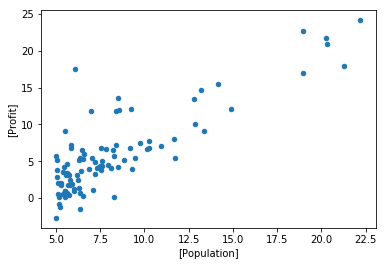

In [4]:
df.plot(kind = "scatter", x = ["Population"], y = ["Profit"])

In [5]:
def cost(X, Y, w, b):
    j = 0
    for i in range(df.shape[0]):
        j += (X[i] * w + b - Y[i]) ** 2
    return j / df.shape[0]

In [6]:
def gradientdescent(X, Y, w, b, n):
    for i in range(df.shape[0]):
        w -= n * (X[i] * w + b - Y[i]) * X[i]
        b -= n * (X[i] * w + b - Y[i])
    return w, b

In [7]:
X, Y, b, w, n, steps, cutoff = df['Population'], df['Profit'], 0, 0, 0.0005, 0, 10.3
loss = cutoff + 1
while loss >= cutoff:
    loss = cost(X, Y, w, b)
    w, b = gradientdescent(X, Y, w, b, n)
    steps += 1
print("Steps:", steps, "Weight:", w, "Bias:", b)

Steps: 836 Weight: 1.0505029561507893 Bias: -3.754988432873536


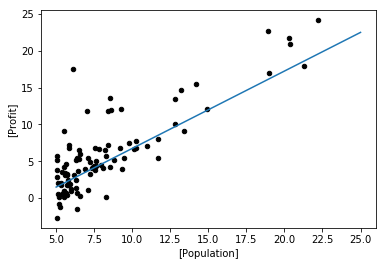

In [8]:
import matplotlib.pyplot as plt
df.plot(kind = "scatter", x = ["Population"], y = ["Profit"], color = "Black")
plx = [5, 25]
ply = [w * plx[0] + b, w * plx[1] + b]
plt.plot(plx, ply)

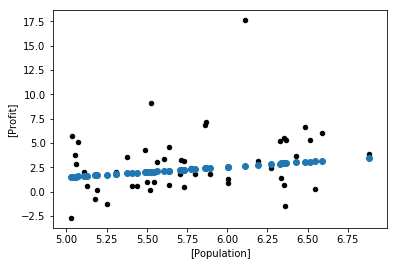

In [9]:
df1 = df[(df["Population"] > 3.5) & (df["Population"] < 7)]
fpx, fpy = [], []
for i in range(df1.shape[0]):
    fpx += [df1.iloc[i, 0]]
    fpy += [w * fpx[i] + b]
df1.plot(kind = "scatter", x = ["Population"], y = ["Profit"], color = "Black")
plt.scatter(fpx, fpy)

In [10]:
from sklearn import linear_model
model = linear_model.LinearRegression()
arr = []
model.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))
preds = model.predict(X.values.reshape(-1, 1))

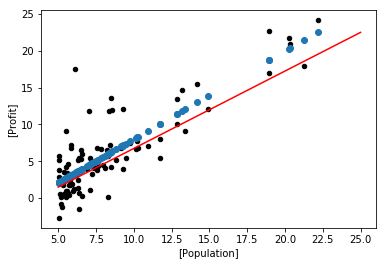

In [11]:
df.plot(kind = "scatter", x = ["Population"], y = ["Profit"], color = "Black")
plt.scatter(X, preds)
plx = [5, 25]
ply = [w * plx[0] + b, w * plx[1] + b]
plt.plot(plx, ply, color = "Red")